## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

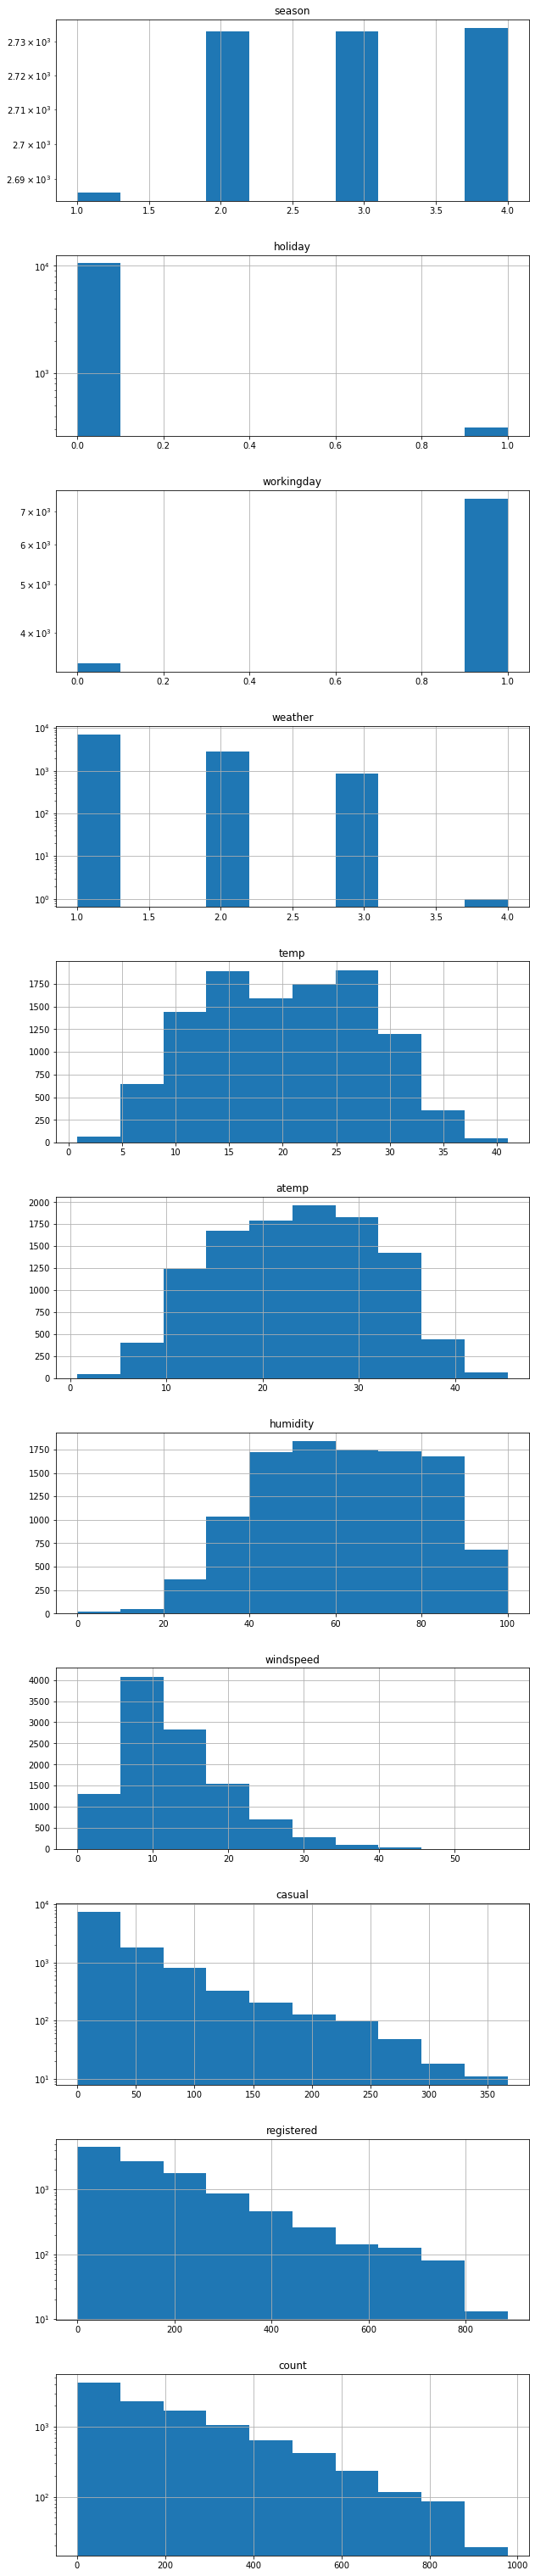

In [2]:
fig, axs = plt.subplots(figsize=(10,55), nrows=11)

for i, metrics in enumerate(list(df.columns)):
    if metrics in ['season', 'holiday', 'workingday', 'weather', 'casual', 'registered', 'count']:
        log=True
    else:
        log=False
    ax = axs[i]
    df.hist(column=metrics, ax=ax, log=log)

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [3]:
df_statistics = df.describe(percentiles=[0.5, 0.75, 0.99])\
.loc[['mean','std', '50%', '75%', '99%'],:]\
.append(df.mode())
df_statistics.loc['std', :] = df_statistics.loc['std', :] ** 2
df_statistics.index = ['mean', 'dispersion', '50%', '75%', '99%', 'mode']
df_statistics

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
dispersion,1.245845,0.027755,0.217304,0.401751,60.708872,71.818856,370.371306,66.659670,2496.049219,22812.789514,32813.313153
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.080000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
mode,4.000000,0.000000,1.000000,1.000000,14.760000,31.060000,88.000000,0.000000,0.000000,3.000000,5.000000


* В столбцах `casual`, `registered` и `count` значения среднего и медианы сильно отличаются, что говорит о наличии выбросов по этим метрикам.

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [4]:
for metrics in list(df.columns):
    print('Ассиметрия ' + metrics, skew(df[metrics]))
    print('Эксцесс ' + metrics, kurtosis(df[metrics]))
    print('---------------------------')

Ассиметрия season -0.007074695296526289
Эксцесс season -1.3555899543299803
---------------------------
Ассиметрия holiday 5.6597371332540805
Эксцесс holiday 30.032624417535125
---------------------------
Ассиметрия workingday -0.7760560687198784
Эксцесс workingday -1.3977369782030475
---------------------------
Ассиметрия weather 1.2433126730817885
Эксцесс weather 0.39480007841067577
---------------------------
Ассиметрия temp 0.0036903358354289715
Эксцесс temp -0.9146613849825282
---------------------------
Ассиметрия atemp -0.10254538108264065
Эксцесс atemp -0.8502363689497141
---------------------------
Ассиметрия humidity -0.0863232869219358
Эксцесс humidity -0.760019710012902
---------------------------
Ассиметрия windspeed 0.5886853963635482
Эксцесс windspeed 0.629292367034056
---------------------------
Ассиметрия casual 2.495404491505502
Эксцесс casual 7.547610130561701
---------------------------
Ассиметрия registered 1.5245944734221468
Эксцесс registered 2.6243238654959855
--

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Судя по гистограммам и коэффициентам ассиметрии и эксцесса, распредление следующих метрик похоже на нормальное:
* `temp`
* `atemp` 
* `humidity`


Проверим это, используя qqplot.

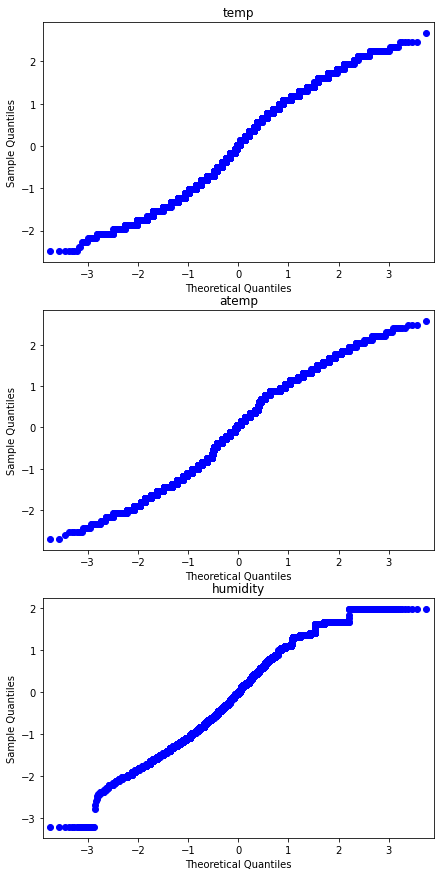

In [5]:
fig, axs = plt.subplots(figsize=(7,15), nrows=3)
for i, nmetrics in enumerate(['temp', 'atemp', 'humidity']):
    ax = axs[i]
    sm.qqplot(df[nmetrics], fit = True, ax=ax)
    ax.set_title(nmetrics)
plt.show()

Самой большой дисперсией из вышеперечисленных метрик обладает `humidity`. Построим для нее доверительный интервал при $alpha = 0.95$.

In [6]:
interval = stats.norm.interval(alpha=0.95, loc=df['humidity'].mean(), scale=df['humidity'].std())
print(interval)

(24.166887568006032, 99.60603177794289)


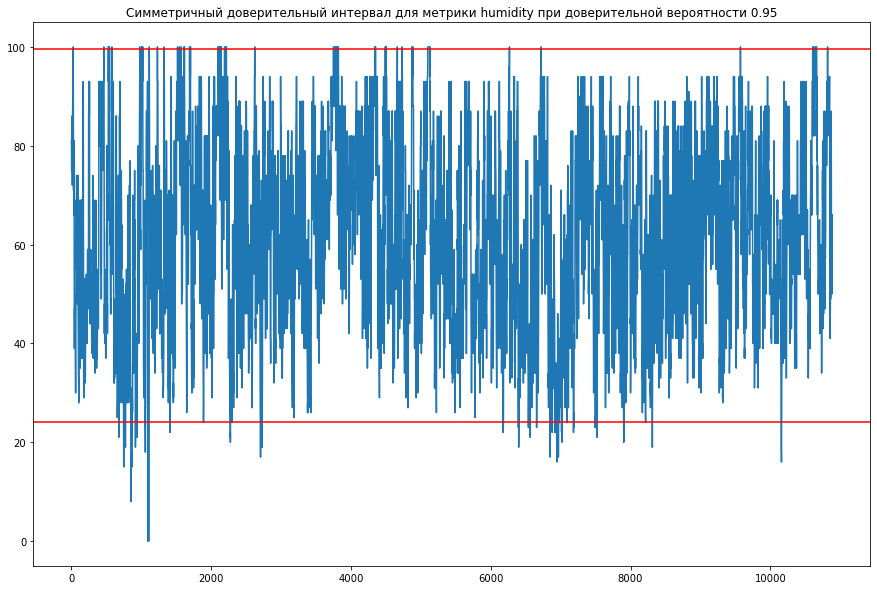

In [7]:
plt.figure(figsize=(15,10))
df['humidity'].plot()
plt.axhline(interval[0], color='red', linestyle='-')
plt.axhline(interval[1], color='red', linestyle='-')
plt.title('Симметричный доверительный интервал для метрики humidity при доверительной вероятности 0.95')
plt.show()

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [8]:
for metrics in list(df.columns):
    upper_level = df[metrics].mean() + 3 * df[metrics].std()
    lower_level = df[metrics].mean() - 3 * df[metrics].std()
    print(metrics, df[(df[metrics] < lower_level) | (df[metrics] > upper_level)][metrics].count())
    print('------------------------------')


season 0
------------------------------
holiday 311
------------------------------
workingday 0
------------------------------
weather 1
------------------------------
temp 0
------------------------------
atemp 0
------------------------------
humidity 22
------------------------------
windspeed 67
------------------------------
casual 292
------------------------------
registered 235
------------------------------
count 147
------------------------------


Наибольшее число аномалий по метрике `holiday`

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [9]:
corr_m = df.corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


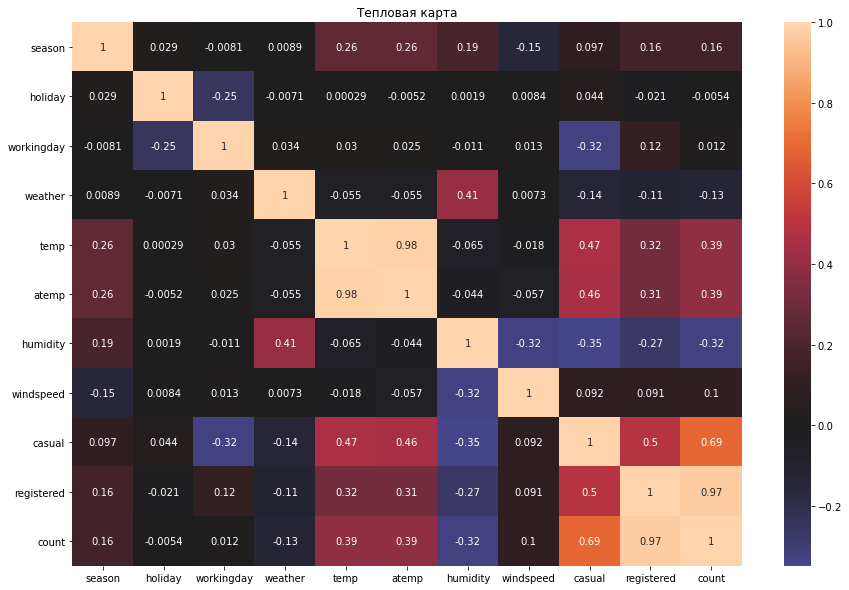

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_m, center=0, annot=True)
plt.title('Тепловая карта')
plt.show()

Очень высокую силу связи имеют следующие метрики:
* `atemp` и `temp`
* `registered` и `count`


Среднюю силу связи имеют следующие метрики:
* `casual` и `registered`
* `casual` и `count`